# Mchezopesa Prediction Results

# 1. Defining the question

## a) Specifying the question

As a football analyst for Mchezopesa Ltd, I will be predicting the results of a game between team 1 and 2 based on:

i) who's home and who's away

ii) whether or not the game is friendly (include rank in your training).

## b) Defining the metric of success

The prediction will be considered successful if the accuracy of the models is 80% and above.

Anything below this will reduce the efficiency of the prediction model.

## c) Understanding the context

The project is based on data gotten from FIFA which is an international governing body of association football. This data spans over many years so it will be useful in training the model to make accurate predictions of the research question.



## d) Recording the Experimental Design

For this project, two approaches will be used:

1. Polynomial Regression Approach

2. Logistic Regression Approach

## e) Data relevance


The data provided is sufficient for this project. I however would have wished for data on ranking of the different teams to have been provided.

# 2. Reading the Data

In [0]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [4]:
# Load the datasets

fifa = pd.read_csv('/content/fifa_ranking.csv')
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [5]:
results = pd.read_csv('/content/results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# 3. Checking the Data

In [6]:
# Determine the no of records in the dataset
results.shape

(40839, 9)

In [7]:
fifa.shape

(57793, 16)

In [8]:
# Check datatypes of the columns

fifa.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [9]:
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [10]:
print(results.tournament.value_counts())

Friendly                                16911
FIFA World Cup qualification             7100
UEFA Euro qualification                  2432
African Cup of Nations qualification     1616
FIFA World Cup                            900
                                        ...  
World Unity Cup                             4
Dragon Cup                                  4
AFF Championship qualification              2
Copa América qualification                  2
Atlantic Heritage Cup                       2
Name: tournament, Length: 109, dtype: int64


In [11]:
fifa.confederation.value_counts()

UEFA        14933
CAF         14876
AFC         12617
CONCACAF     9664
CONMEBOL     2860
OFC          2843
Name: confederation, dtype: int64

In [12]:
fifa.rank_date.value_counts()

2017-06-01    211
2016-11-24    211
2018-03-15    211
2017-03-09    211
2017-12-21    211
             ... 
1993-12-23    168
1993-10-22    167
1993-08-08    167
1993-09-23    167
1994-02-15    167
Name: rank_date, Length: 286, dtype: int64

In [13]:
results.date.value_counts()

2012-02-29    66
2016-03-29    63
2008-03-26    60
2014-03-05    59
2012-11-14    56
              ..
1985-08-06     1
1975-10-08     1
1952-11-12     1
2010-01-19     1
1961-05-27     1
Name: date, Length: 15115, dtype: int64

In [14]:
fifa.country_full.value_counts()

Sudan                    325
Hong Kong                286
Benin                    286
Burkina Faso             286
Switzerland              286
                        ... 
Zaire                     66
Serbia and Montenegro     43
Kosovo                    24
Gibraltar                 22
RCS                        5
Name: country_full, Length: 216, dtype: int64

In [15]:
results.country.value_counts()

United States          1144
France                  801
England                 687
Malaysia                644
Sweden                  637
                       ... 
Bohemia and Moravia       1
Belgian Congo             1
Portuguese Guinea         1
Mali Federation           1
Lautoka                   1
Name: country, Length: 266, dtype: int64

In [16]:
# Rename the column country_full to country so that an inner join can be done on the 2 datasets

df = fifa.rename(columns = {'country_full':'country'})
df.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [17]:
# Merge the 2 datasets 

game = df.merge(results, how='inner', on='country')
game.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,False
3,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-03-26,Germany,Switzerland,6,2,Friendly,Stuttgart,False
4,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-10-09,Germany,Austria,1,2,Friendly,Dresden,False


# 4. External Data Source Validation

# 5. Tidying the Dataset

In [0]:
# Drop unnecessary columns
# I'll drop the abbreviations column because it's not not necessary

game.drop(['country_abrv'], axis = 1, inplace = True) 

In [0]:
game.drop(['rank_date'], axis = 1, inplace = True) 

In [20]:
# Check for missing values

game.isnull().sum()

# No missing values were found

rank                       0
country                    0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
neutral                    0
dtype: int64

In [21]:
# Check for duplicated values

game.duplicated().any()


True

In [0]:
# Drop the duplicated columns

game.drop_duplicates(keep = False, inplace = True)

In [23]:
# Check whether changes have been made

game.duplicated().any()

False

In [0]:
# Change the dates columns to datetime type

game.date = pd.to_datetime(game.date)

In [25]:
# Check whether the change have been made

game.dtypes

rank                                int64
country                            object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
date                       datetime64[ns]
home_team                          object
away_team                          object
home_score                          int64
away_score                          int64
tournament                         object
city                               object
neutral                              bool
dtype: object

In [26]:
# Remove whitespaces in the columns

game.columns.str.replace(" "," ")

Index(['rank', 'country', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral'],
      dtype='object')

In [27]:
# Check for outliers
# Find IQR Score first

# Drop the date column when removing the outliers as it clahses with the float datatypes

df = game.drop(['date'], 1)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

rank                        78.00
total_points               219.30
previous_points            496.00
rank_change                  3.00
cur_year_avg                92.92
cur_year_avg_weighted       92.92
last_year_avg               91.85
last_year_avg_weighted      45.92
two_year_ago_avg            87.55
two_year_ago_weighted       26.26
three_year_ago_avg          87.61
three_year_ago_weighted     17.52
home_score                   1.00
away_score                   2.00
neutral                      0.00
dtype: float64


In [28]:
# Multiply the (IQR) by 1.5
# Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
# Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.

(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))


# True indicates the prescence of an outlier

,away_score,away_team,city,confederation,country,cur_year_avg,cur_year_avg_weighted,home_score,home_team,last_year_avg,last_year_avg_weighted,neutral,previous_points,rank,rank_change,three_year_ago_avg,three_year_ago_weighted,total_points,tournament,two_year_ago_avg,two_year_ago_weighted
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10246505,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10246506,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10246507,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10246508,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
# Remove the outliers

df_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_outliers.shape

(4128104, 21)

In [0]:
# Export the cleaned dataset

df_outliers.to_csv('game_clean.csv')

In [166]:
game_clean = pd.read_csv('game_clean.csv')
game_clean.tail()

,Unnamed: 0,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,home_team,away_team,home_score,away_score,tournament,city,neutral
4128099,10246504,195,Gibraltar,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Gibraltar,Latvia,1,0,Friendly,Gibraltar,False
4128100,10246505,195,Gibraltar,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Gibraltar,North Macedonia,0,2,UEFA Nations League,Gibraltar,False
4128101,10246506,195,Gibraltar,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Gibraltar,Liechtenstein,2,1,UEFA Nations League,Gibraltar,False
4128102,10246508,195,Gibraltar,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Gibraltar,Republic of Ireland,0,1,UEFA Euro qualification,Gibraltar,False
4128103,10246509,195,Gibraltar,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Gibraltar,Estonia,0,1,Friendly,Gibraltar,False


# 6. Exploratory Data Analysis

In [205]:
# Change the categorical variables to numerical variables

from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

game_clean['country'] = en.fit_transform(game_clean['country'])
game_clean['home_team'] = en.fit_transform(game_clean['home_team'])
game_clean['away_team'] = en.fit_transform(game_clean['away_team'])
game_clean['neutral'] = en.fit_transform(game_clean['neutral'])
game_clean['tournament'] = en.fit_transform(game_clean['tournament'])
game_clean['confederation'] = en.fit_transform(game_clean['confederation'])
game_clean['city'] = en.fit_transform(game_clean['city'])

game_clean.head()

,Unnamed: 0,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,home_team,away_team,home_score,away_score,tournament,city,neutral
0,0,1,69,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,81,234,1,0,50,559,0
1,1,1,69,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,81,25,0,3,50,352,0
2,2,1,69,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,81,167,1,2,50,588,0
3,4,1,69,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,81,17,1,2,50,346,0
4,5,1,69,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,81,233,1,3,50,461,0


## Univariate Analysis

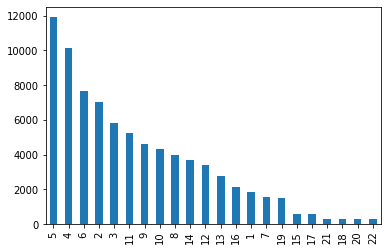

In [156]:
game_clean['rank'].head(80000).value_counts().plot(kind= 'bar')

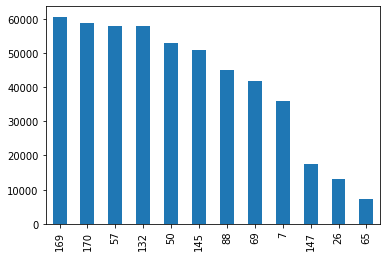

In [141]:
game_clean['country'].head(500000).value_counts().plot(kind= 'bar')

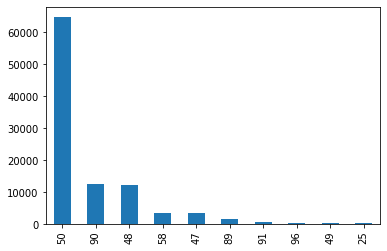

In [143]:
game_clean['tournament'].head(100000).value_counts().plot(kind= 'bar')

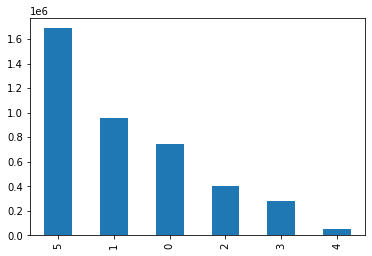

In [147]:
game_clean['confederation'].value_counts().plot(kind= 'bar')

**Observation**
1. UEFA competition was the most popular under confederations
2. Under ranking, most countries tied at number 5. 
3. The top ranked countries are Germany, Brazil, France, Spain and Italy.
4. The most popular tournament is the Friendly one, followed by the FIFA Workd Cup Qualification

## Bivariate Analysis

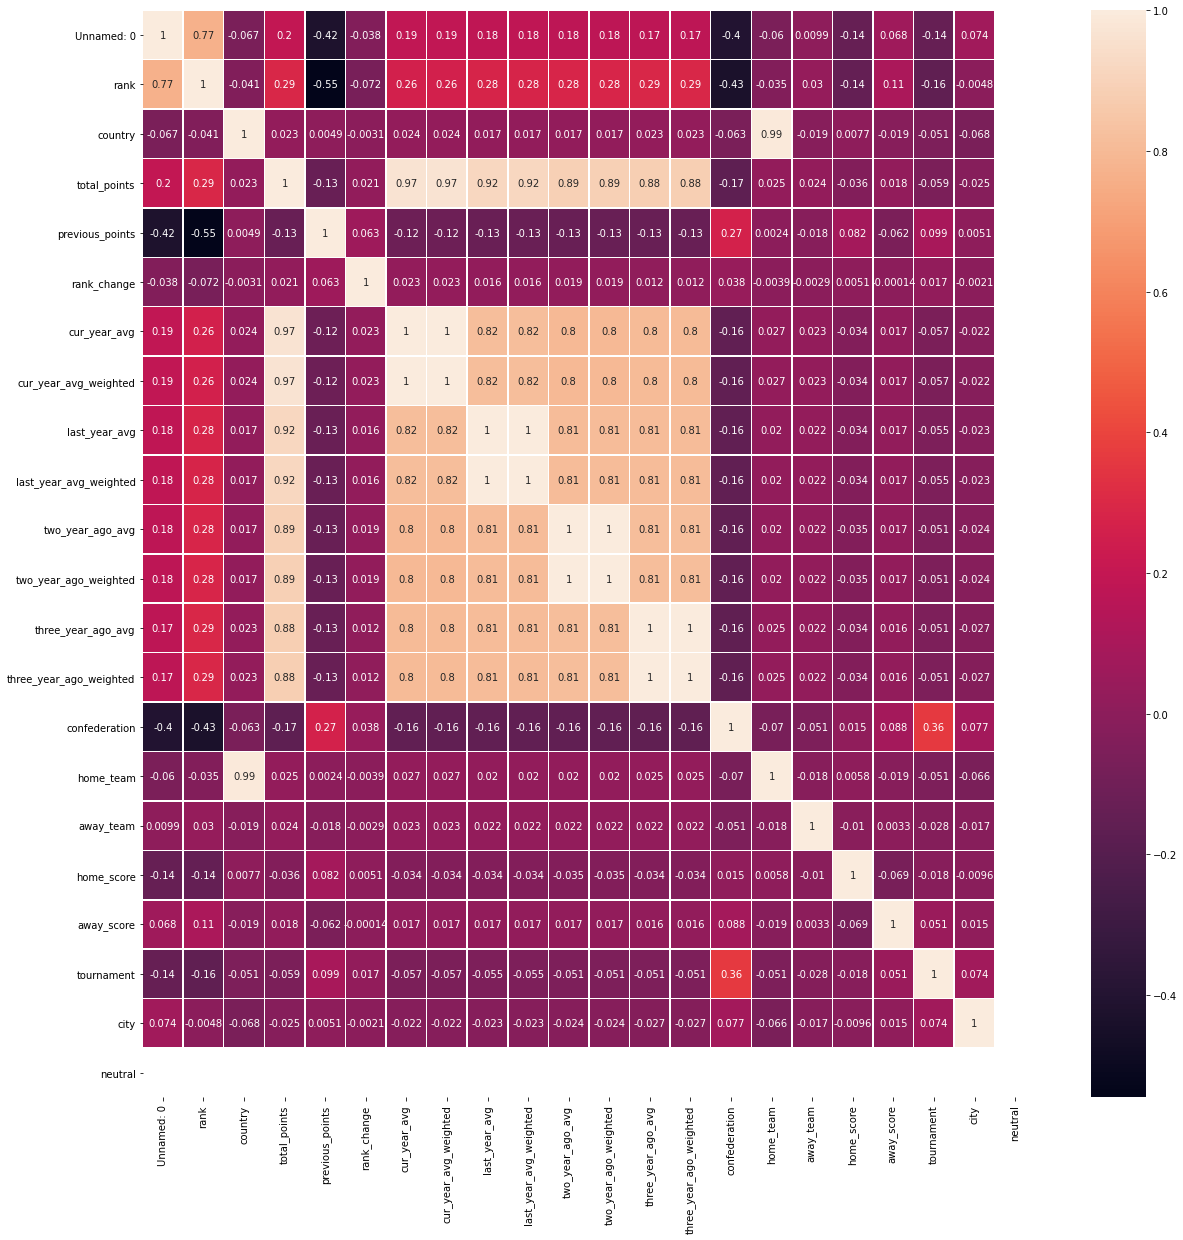

In [162]:
# Create a correlation matrix
correlation = game_clean.corr()
correlation


fig, ax = plt.subplots(figsize=(20, 20)) 
sns.heatmap(correlation, annot=True,  linewidths=.5, ax=ax)

**Observation**

There is no strong relation between the team playing at home and their scores or the team playing away and their scores.

There is a strong correlation between the variables showing the average points in teh different years.

# 7. Polynomial Regression Model

## Hyperparameter tuning

In [0]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


# Split the dataset into independent and dependent variables

X = game_clean[['tournament', 'home_team', 'away_team']].values
y = game_clean['home_score'].values

## Multicollinearity check

In [40]:
# Remove the serial and admit chance columns, we want to focus on our independent variables only.
independent_variables = game_clean.drop(columns=['Unnamed: 0', 'home_score', 'away_score', 'neutral'])

# Let's display the correlations between the variables
a = independent_variables.corr()
a

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,home_team,away_team,tournament,city
rank,1.000000,-0.040909,0.289562,-0.545367,-0.071947,0.260609,0.260609,0.277587,0.277587,0.283250,0.283251,0.287691,0.287692,-0.431906,-0.035420,0.029664,-0.164492,-0.004832
country,-0.040909,1.000000,0.022759,0.004942,-0.003092,0.024149,0.024149,0.017345,0.017345,0.017492,0.017492,0.022528,0.022528,-0.062513,0.989012,-0.018820,-0.051181,-0.067721
total_points,0.289562,0.022759,1.000000,-0.130465,0.021172,0.966591,0.966591,0.920717,0.920718,0.889381,0.889383,0.882349,0.882349,-0.169250,0.025457,0.024319,-0.058832,-0.024646
previous_points,-0.545367,0.004942,-0.130465,1.000000,0.062922,-0.115797,-0.115797,-0.125744,-0.125744,-0.130206,-0.130206,-0.132364,-0.132365,0.265948,0.002354,-0.018341,0.098647,0.005091
rank_change,-0.071947,-0.003092,0.021172,0.062922,1.000000,0.023186,0.023186,0.016481,0.016481,0.019249,0.019250,0.011921,0.011921,0.038428,-0.003906,-0.002904,0.016553,-0.002082
cur_year_avg,0.260609,0.024149,0.966591,-0.115797,0.023186,1.000000,1.000000,0.815358,0.815359,0.797851,0.797852,0.801641,0.801640,-0.158873,0.026645,0.023491,-0.056921,-0.022258
cur_year_avg_weighted,0.260609,0.024149,0.966591,-0.115797,0.023186,1.000000,1.000000,0.815358,0.815359,0.797851,0.797852,0.801641,0.801640,-0.158873,0.026645,0.023491,-0.056921,-0.022258
last_year_avg,0.277587,0.017345,0.920717,-0.125744,0.016481,0.815358,0.815358,1.000000,1.000000,0.810181,0.810182,0.811778,0.811781,-0.156487,0.019901,0.022292,-0.055199,-0.022796
last_year_avg_weighted,0.277587,0.017345,0.920718,-0.125744,0.016481,0.815359,0.815359,1.000000,1.000000,0.810181,0.810183,0.811779,0.811782,-0.156488,0.019900,0.022292,-0.055199,-0.022797
two_year_ago_avg,0.283250,0.017492,0.889381,-0.130206,0.019249,0.797851,0.797851,0.810181,0.810181,1.000000,1.000000,0.814019,0.814019,-0.158333,0.020020,0.021523,-0.050812,-0.023587


In [41]:
pd.DataFrame(np.linalg.inv(a.values), index = a.index, columns=a.columns)


,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,home_team,away_team,tournament,city
rank,1.755021e+00,1.927307e-01,3.462867e+02,7.676467e-01,6.477282e-02,2.420108e+11,-2.421000e+11,-2.052746e+02,1.102655e+02,-7.156245e+00,-4.682992e+01,3.772315e+03,-3.810110e+03,4.961491e-01,-8.779710e-02,-2.489406e-03,2.200306e-02,-3.674013e-02
country,1.945180e-01,4.590137e+01,-1.010781e+01,4.781283e-02,-1.657968e-02,3.552634e+10,-3.551998e+10,-3.438030e+01,3.711371e+01,-9.475009e+01,9.633250e+01,5.213713e+02,-5.204916e+02,-2.713276e-01,-4.539337e+01,5.225130e-02,1.526254e-01,1.131788e-01
total_points,-1.737985e+03,1.225734e+02,2.991737e+08,1.008346e+02,-3.818864e+01,-5.938249e+16,5.938249e+16,5.553529e+07,-1.370069e+08,3.048842e+06,-4.956204e+07,-9.193598e+08,8.881305e+08,-1.059113e+03,-4.706387e+02,4.721288e+01,-2.932179e+02,5.005563e-01
previous_points,7.679777e-01,4.789101e-02,-1.487475e+01,1.429053e+00,-3.166514e-02,-4.007992e+09,4.007668e+09,3.828294e+00,2.081457e-01,4.017121e+00,-1.709046e+00,-6.875043e+01,7.029190e+01,-5.518193e-02,-2.604933e-02,2.175816e-03,4.426372e-03,7.159515e-04
rank_change,6.837342e-02,-1.712874e-02,3.345681e+02,-3.192429e-02,1.008705e+00,1.459071e+11,-1.459071e+11,-1.225561e+02,3.148209e+01,-1.093005e+02,5.724831e+01,2.183997e+03,-2.218897e+03,-6.129394e-03,2.481943e-02,1.052784e-03,-1.589422e-03,2.776863e-03
cur_year_avg,2.356612e+11,-2.514821e+10,1.182040e+16,-1.496418e+10,2.173327e+10,8.089061e+24,-8.089061e+24,-1.491622e+16,1.169936e+16,-6.498246e+15,4.659915e+15,1.209747e+17,-1.222089e+17,1.582629e+11,8.208766e+10,-5.247797e+09,3.803827e+10,-3.288978e+08
cur_year_avg_weighted,-2.356612e+11,2.514821e+10,-1.182040e+16,1.496418e+10,-2.173327e+10,-8.089061e+24,8.089061e+24,1.491622e+16,-1.169936e+16,6.498246e+15,-4.659915e+15,-1.209747e+17,1.222089e+17,-1.582629e+11,-8.208766e+10,5.247797e+09,-3.803827e+10,3.288978e+08
last_year_avg,9.766393e+03,-9.853239e+02,4.237931e+08,-6.083882e+02,1.024918e+03,3.269451e+17,-3.269451e+17,-2.795808e+08,1.642539e+08,-2.582548e+08,1.923435e+08,4.885340e+09,-4.929590e+09,6.481707e+03,3.187850e+03,-2.548193e+02,1.479098e+03,-1.093875e+02
last_year_avg_weighted,-9.293305e+03,9.519745e+02,-5.052549e+08,5.809216e+02,-1.014528e+03,-3.107777e+17,3.107777e+17,2.644607e+08,-1.269499e+08,2.574263e+08,-1.788500e+08,-4.635034e+09,4.687788e+09,-6.193360e+03,-3.059730e+03,2.419616e+02,-1.399254e+03,1.092527e+02
two_year_ago_avg,9.951591e+01,-5.682851e+01,-4.906369e+07,6.378155e+00,-1.934101e-01,-3.016767e+15,3.016767e+15,9.955463e+06,3.403702e+06,1.470903e+08,-1.394623e+08,-4.482953e+07,4.995153e+07,4.089465e+01,5.220497e+01,1.210350e+00,4.917918e+00,1.839791e+01


From the above, no variable has a VIF greater than 4, meaning no independent variables are correlated. 

## Model 1

In [0]:
# Predict how many goals the home team scores given rank of home team, rank of away team and tournament type

# Define the X and y variables
# My X variables are:
# X = game_clean[['tournament', 'home_team', 'away_team']].values

# For this regression I'll use them one at a time.

# Polynomial regression when X is tournament variable

X = game_clean.head(1000)[['tournament']].values
y = game_clean.head(1000)['home_score'].values


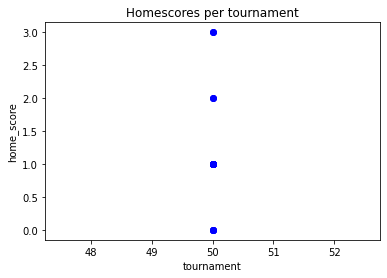

In [216]:
# Visualize X and y on a scatter plot

plt.scatter(X,y, color='blue') 
plt.title('Homescores per tournament')
plt.xlabel('tournament')
plt.ylabel('home_score')
plt.show()

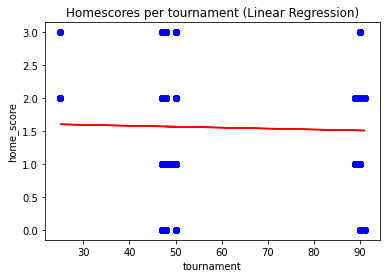

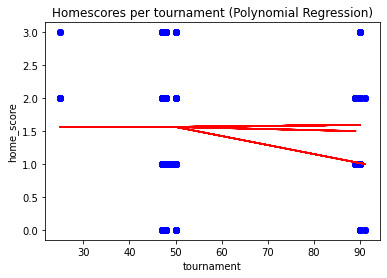

In [252]:
# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset

reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results

plt.scatter(X, y, color='blue') 
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Homescores per tournament (Linear Regression)')
plt.xlabel('tournament')
plt.ylabel('home_score')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 38) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results

plt.scatter(X, y, color='blue') 
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Homescores per tournament (Polynomial Regression)')
plt.xlabel('tournament')
plt.ylabel('home_score')
plt.show()

In [262]:
# Do predictions

# Predict using linear regression
lin_pred = reg_line.predict([[52]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[52]]))
print('Polynomial prediction: %d' %poly_pred)

Linear prediction: 1
Polynomial prediction: 1


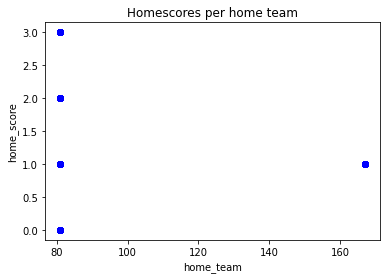

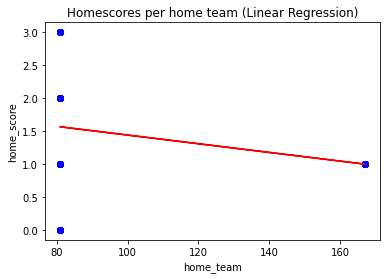

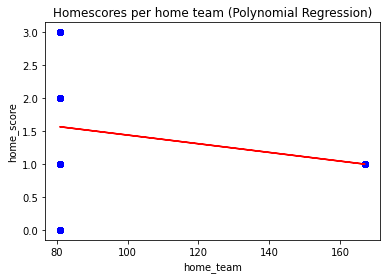

In [257]:
# Polynomial regression when X is home_team variable

X = game_clean.head(1000)[['home_team']].values
y = game_clean.head(1000)['home_score'].values

# Visualize X and y on a scatter plot

plt.scatter(X,y, color='blue') 
plt.title('Homescores per home team')
plt.xlabel('home_team')
plt.ylabel('home_score')
plt.show()

# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset

reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results

plt.scatter(X, y, color='blue') 
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Homescores per home team (Linear Regression)')
plt.xlabel('home_team')
plt.ylabel('home_score')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results

plt.scatter(X, y, color='blue') 
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Homescores per home team (Polynomial Regression)')
plt.xlabel('home_team')
plt.ylabel('home_score')
plt.show()

In [261]:
# Do predictions

# Predict using linear regression
lin_pred = reg_line.predict([[90]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[90]]))
print('Polynomial prediction: %d' %poly_pred)

Linear prediction: 1
Polynomial prediction: 1


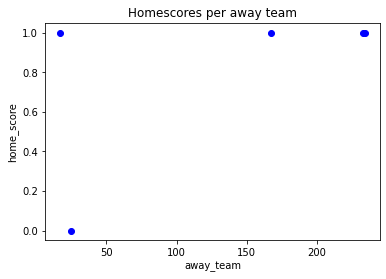

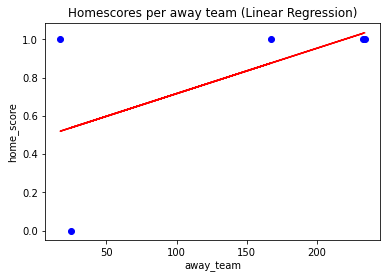

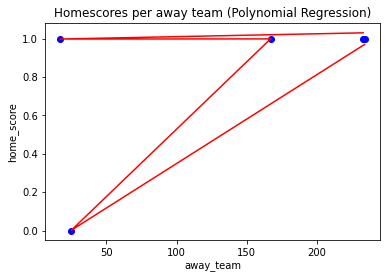

In [232]:
# Polynomial regression when X is away_team variable

X = game_clean.head(5)[['away_team']].values
y = game_clean.head(5)['home_score'].values

# Visualize X and y on a scatter plot

plt.scatter(X,y, color='blue') 
plt.title('Homescores per away team')
plt.xlabel('away_team')
plt.ylabel('home_score')
plt.show()

# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset

reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results

plt.scatter(X, y, color='blue') 
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Homescores per away team (Linear Regression)')
plt.xlabel('away_team')
plt.ylabel('home_score')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results

plt.scatter(X, y, color='blue') 
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Homescores per away team (Polynomial Regression)')
plt.xlabel('away_team')
plt.ylabel('home_score')
plt.show()

In [236]:
# Do predictions

# Predict using linear regression
lin_pred = reg_line.predict([[234]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[234]]))
print('Polynomial prediction: %d' %poly_pred)


Linear prediction: 1
Polynomial prediction: 0


## Residual plots, assess heteroscedasticity

In [220]:
# Get the residuals

X = game_clean[['tournament', 'home_team', 'away_team']].values
y = game_clean['home_score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.00047353328472523714

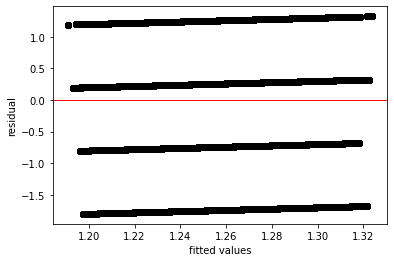

In [221]:
# Do a residual plot

import matplotlib.pyplot as plt

plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [222]:
# Perform the bartlett's test

import scipy as sp
from scipy.stats import stats

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


inf
the variances are homogeneous!


**Conclusion**

1. For X variables tournament and home team, the scatter I plots I created to visualize the data were really unusual. They formed patterns whereby most points couldn't be covered by a line of fit.

For the X variable away team, the scatter plot originated from 0 which seems normal.

2. For the two X variables, tournament and home team, the line of fit did not cover most points. I thus stopped adding degrees when I stopped seeing a noticeable change in the number of points covered.

For the X variable away team, the model is pretty good as it passes just about the right amount of points and also the distance from the curve to the points that it does not pass through (1 point) is at a minimum. Hence, this model can be used to make predictions.

3. Regarding predictions, for the two X variables, tournament and home team, the predictions made were very accurate. 

When X is away_team, comparison between linear prediction and polynomial prediction did not show a big difference.

The reason for this could be that the scores for the home team do not have a big variance so predictions will be numbers close to each other.

4. I got the mean of residuals as 0.0004. Since it's a value close to zero, it indicates that it is fairly correct. 

The residual plot was not all centered about the mean that is very close to 0. The residuals should be scattered randomly, but from the plot they look like they follow a certain pattern. Thus I would say this model does not pass the unpredictable residuals test.

5. As for homoscedasticity, the variances were homogenous so the model passed the homoscedasticity test.



## Model 2

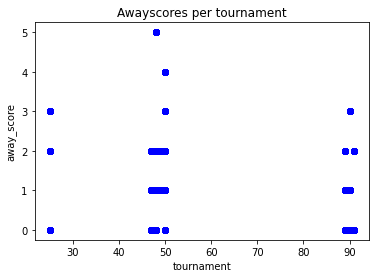

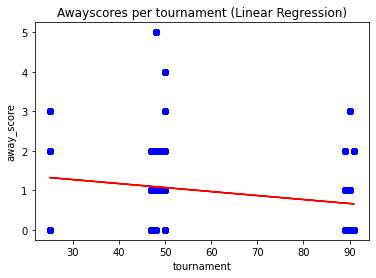

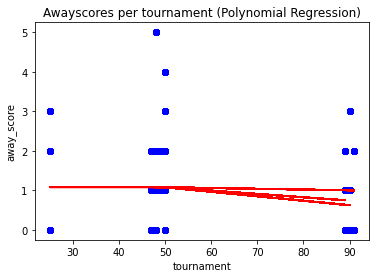

In [250]:
# Predict how many goals the away team scores given rank of home team, rank of away team and tournament type

# Define the X and y variables
# My X variables are:
# X = game_clean[['tournament', 'home_team', 'away_team']].values

# For this regression I'll use them one at a time.

# Polynomial regression when X is tournament variable

X = game_clean.head(10000)[['tournament']].values
y = game_clean.head(10000)['away_score'].values

# Visualize X and y on a scatter plot

plt.scatter(X,y, color='blue') 
plt.title('Awayscores per tournament')
plt.xlabel('tournament')
plt.ylabel('away_score')
plt.show()

# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset

reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results

plt.scatter(X, y, color='blue') 
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Awayscores per tournament (Linear Regression)')
plt.xlabel('tournament')
plt.ylabel('away_score')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 38) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results

plt.scatter(X, y, color='blue') 
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Awayscores per tournament (Polynomial Regression)')
plt.xlabel('tournament')
plt.ylabel('away_score')
plt.show()

In [263]:
# Do predictions

# Predict using linear regression
lin_pred = reg_line.predict([[52]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[52]]))
print('Polynomial prediction: %d' %poly_pred)

Linear prediction: 1
Polynomial prediction: 1


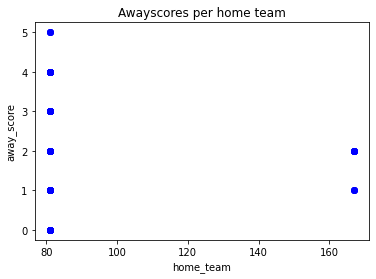

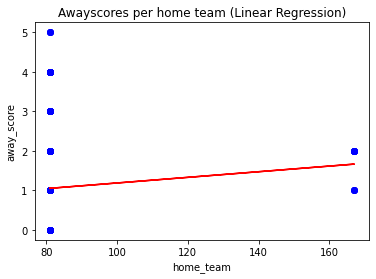

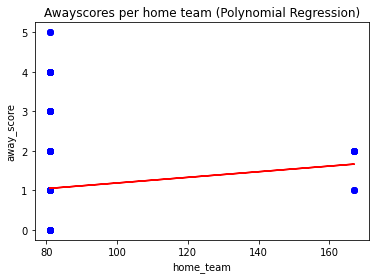

In [269]:
# Polynomial regression when X is home_team variable

X = game_clean.head(1000)[['home_team']].values
y = game_clean.head(1000)['away_score'].values

# Visualize X and y on a scatter plot

plt.scatter(X,y, color='blue') 
plt.title('Awayscores per home team')
plt.xlabel('home_team')
plt.ylabel('away_score')
plt.show()

# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset

reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results

plt.scatter(X, y, color='blue') 
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Awayscores per home team (Linear Regression)')
plt.xlabel('home_team')
plt.ylabel('away_score')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results

plt.scatter(X, y, color='blue') 
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Awayscores per home team (Polynomial Regression)')
plt.xlabel('home_team')
plt.ylabel('away_score')
plt.show()

In [271]:
# Do predictions

# Predict using linear regression
lin_pred = reg_line.predict([[93]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[93]]))
print('Polynomial prediction: %d' %poly_pred)

Linear prediction: 1
Polynomial prediction: 1


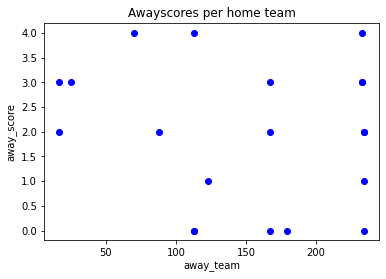

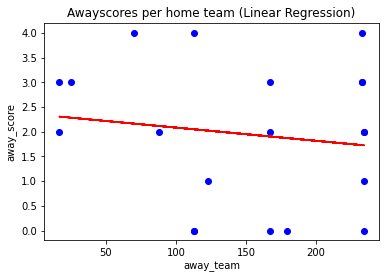

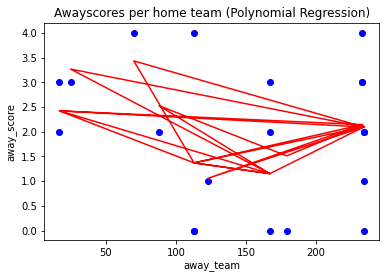

In [275]:
# Polynomial regression when X is away_team variable

X = game_clean.head(20)[['away_team']].values
y = game_clean.head(20)['away_score'].values

# Visualize X and y on a scatter plot

plt.scatter(X,y, color='blue') 
plt.title('Awayscores per home team')
plt.xlabel('away_team')
plt.ylabel('away_score')
plt.show()

# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset

reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results

plt.scatter(X, y, color='blue') 
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Awayscores per home team (Linear Regression)')
plt.xlabel('away_team')
plt.ylabel('away_score')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results

plt.scatter(X, y, color='blue') 
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Awayscores per home team (Polynomial Regression)')
plt.xlabel('away_team')
plt.ylabel('away_score')
plt.show()

In [276]:
# Do predictions

# Predict using linear regression
lin_pred = reg_line.predict([[234]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[234]]))
print('Polynomial prediction: %d' %poly_pred)

Linear prediction: 1
Polynomial prediction: 2


## Residual plots, assess heteroscedasticity

In [277]:
# Get the residuals

X = game_clean[['tournament', 'home_team', 'away_team']].values
y = game_clean['away_score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.00032440237124491074

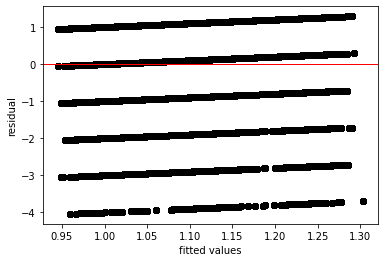

In [278]:
# Do a residual plot

import matplotlib.pyplot as plt

plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [279]:
# Perform the bartlett's test

import scipy as sp
from scipy.stats import stats

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


**Conclusion**

1. For X variables tournament and home team, the scatter I plots I created to visualize the data were really unusual. They formed patterns whereby most points couldn't be covered by a line of fit.

For the X variable away team, the scatter plot seems normal.

2. For the two X variables, tournament and home team, the line of fit did not cover most points. I thus stopped adding degrees when I stopped seeing a noticeable change in the number of points covered.

For the X variable away team, the model is pretty good as it passes just about the right amount of points and also the distance from the curve to the points that it does not pass through (1 point) is at a minimum. Hence, this model can be used to make predictions.

3. Regarding predictions, for the two X variables, tournament and home team, the predictions made were very accurate. 

When X is away_team, comparison between linear prediction and polynomial prediction did not show a big difference.

The reason for this could be that the scores for the home team do not have a big variance so predictions will be numbers close to each other.

4. I got the mean of residuals as 0.0003. Since it's a value close to zero, it indicates that it is fairly correct. 

The residual plot was not all centered about the mean that is very close to 0. Most points were away from 0. The residuals should be scattered randomly, but from the plot they look like they follow a certain pattern. Thus I would say this model does not pass the unpredictable residuals test.

5. As for homoscedasticity, the variances were homogenous so the model passed the homoscedasticity test.

# 8. Logistic Regression Model

In [83]:
# Predict from the home team's perspective if the game is a win, loss or draw.

# Create a column for Status that will show 2 for a win, 0 for a loss and 1 for a draw.

game_clean.loc[game_clean['home_score'] > game_clean['away_score'] , 'Status'] = '2'  
game_clean.loc[game_clean['home_score'] < game_clean['away_score'] , 'Status'] = '0'
game_clean.loc[game_clean['home_score'] == game_clean['away_score'] , 'Status'] = '1'
game_clean

,Unnamed: 0,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,home_team,away_team,home_score,away_score,tournament,city,neutral,Status
0,0,1,69,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,5,81,234,1,0,50,559,0,2
1,1,1,69,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,5,81,25,0,3,50,352,0,0
2,2,1,69,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,5,81,167,1,2,50,588,0,0
3,4,1,69,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,5,81,17,1,2,50,346,0,0
4,5,1,69,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,5,81,233,1,3,50,461,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128099,10246504,195,71,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,5,83,135,1,0,50,420,0,2
4128100,10246505,195,71,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,5,83,174,0,2,91,420,0,0
4128101,10246506,195,71,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,5,83,140,2,1,91,420,0,2
4128102,10246508,195,71,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,5,83,198,0,1,90,420,0,0


## Hyperparameter Tuning

In [0]:
# Define the X and y variables

X = game_clean[['home_team', 'away_team', 'home_score', 'away_score', 'tournament']].values
y = game_clean['Status'].values

In [0]:
# Initiate the logistic regression model with random hyperparameters

lr = LogisticRegression(penalty='l2',dual=False,max_iter=110)

In [122]:
# Fit the X and y variables to the logistic regression model

lr.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=110,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
lr.score(X,y)

1.0

The score 1.0 is very high meaning the model has been optimally tuned to solve the machine learning model

## Multicollinearity check

The multicollinearity check done under polynomial regression showed that the VIF score for each variable was under 4. 

Thus no independent variables are correlated.

## Model

In [0]:
# Split the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [101]:
# Fit the model on the training set

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
# Use the model to make a prediction

y_pred = LogReg.predict(X_test)
y_pred

array(['2', '2', '0', ..., '0', '2', '0'], dtype=object)

In [113]:
# Find the score of the model.

LogReg.score(X_test, y_test)

# The score of the model is very high, meaning the accuracy of the predicted values will be high

1.0

In [114]:
# Show the predicted values alongside the actual values

new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
new

,Actual,Predicted
0,2,2
1,2,2
2,0,0
3,1,1
4,2,2
...,...,...
1238427,0,0
1238428,2,2
1238429,0,0
1238430,2,2


In [115]:
# Show the classification report of the model

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# The precision 1.00 shows that everything was correctly classified

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    376192
           1       1.00      1.00      1.00    334846
           2       1.00      1.00      1.00    527394

    accuracy                           1.00   1238432
   macro avg       1.00      1.00      1.00   1238432
weighted avg       1.00      1.00      1.00   1238432



In [116]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

# The results from the confusion matrix tell us that 376192, 334846 and 527394 are the number of correct predictions. 
# There are zero incorrect predictions.

array([[376192,      0,      0],
       [     0, 334846,      0],
       [     0,      0, 527394]])

## Residual plots, assess heteroscedasticity

In [0]:
X = game_clean[['home_team', 'away_team', 'home_score', 'away_score', 'tournament']].values
y = game_clean['Status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# This is our prediction for y based on our model
y_predict = LogReg.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

Conclusion

Since my model was very accurate, there were no residuals gotten. Thus the residual plot was not plotted. If there were residuals, they should have been centered around 0.

Homoscedasticity shows unequal scatter on residuals. In this case, there are no residuals so performing the bartlett's test is not possible.

In conclusion, the model can very accurately figure out from the home team's perspective if the game is a win, loss or draw

# 9. Implementing the solution

The 3 prediction models have proved to be accurate enough (above 80%). Therefore I woud present them to the company.

# 10. Challenging the solution

Since my models did not pass the scattered residuals test, I would maybe merge the 2 datasets differently. Maybe that will give different results when I am building the models.

# 11. Follow-up questions